In [1]:
# Downloaded the Project From Analytics Vidhya 
# Created by Ratnam Dubey 
# Data Extraction and Data Preprocessing

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as py
import scipy
from scipy.stats import multivariate_normal
import seaborn as sns 

In [3]:
#Importing the Data 
train =  pd.read_csv("D:\\Kaggle Projects\\Market Check\\train.csv")
test =  pd.read_csv("D:\\Kaggle Projects\\Market Check\\test.csv")

In [4]:
#Exploring the Data 
train.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
test.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [6]:
#By Data Exploration we understood that the 
# Predictors are :- User_ID , Product_ID	Gender	Age	Occupation	City_Category	Stay_In_Current_City_Years	Marital_Status	Product_Category_1	Product_Category_2	Product_Category_3
# Target Value :- Purchase

In [7]:
train.describe()

C:\Users\dubey\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,NaN,NaN,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,NaN,NaN,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,NaN,NaN,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [8]:
# Checking the Count of the Marital Status 
train.groupby('Marital_Status').size()

Marital_Status
0    324731
1    225337
dtype: int64

In [9]:
# Most number of Purchaces Are Done by Un-Married Persons 

In [10]:
# Checking the Count and Amount of Purchaces by Married and Unmarried  
train.groupby('Marital_Status')['Purchase'].sum()

Marital_Status
0    3008927447
1    2086885295
Name: Purchase, dtype: int64

In [11]:
# Unmarried Persons have more Sales 

In [12]:
#Checking the Type of Products that people are most Intrested in 
train.groupby(['Product_Category_1'])['Purchase'].sum().plot(kind="bar")

In [13]:
# Maximum Number of Sales is of Product 1 
# Checking the Sales Data  Distribution 

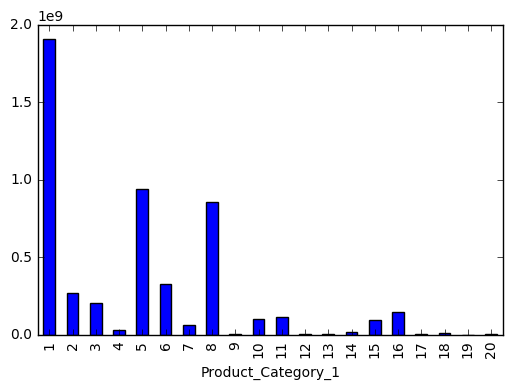

In [14]:
plt.show()

In [15]:
#Checking the Sales For top 3 products by male and female 
train.groupby(['Marital_Status','Product_Category_1']) ['Purchase'].count()

Marital_Status  Product_Category_1
0               1                     84375
                2                     14138
                3                     12359
                4                      7177
                5                     89656
                6                     12139
                7                      2040
                8                     65411
                9                       247
                10                     2778
                11                    14668
                12                     2034
                13                     3162
                14                      846
                15                     3623
                16                     5713
                17                      298
                18                     1641
                19                      946
                20                     1480
1               1                     56003
                2                      97

In [16]:
# getting to know that Top 3 products are 5,1,8 for both married and unmarried persons 

In [17]:
# Getting the Ratio of males and Femaleswho are married 
train.groupby(['Gender'])['Marital_Status'].count()

Gender
F    135809
M    414259
Name: Marital_Status, dtype: int64

In [18]:
# maximum number of females are married 

In [19]:
train.groupby('Gender').count()

,User_ID,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Gender,,,,,,,,,,,
F,135809,135809,135809,135809,135809,135809,135809,135809,91530,37594,135809
M,414259,414259,414259,414259,414259,414259,414259,414259,284900,129227,414259


In [20]:
# maximum number of shopping persons are male on Black friday 

In [21]:
# Getting the Types of Occupation 
train.Occupation.unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [22]:
#there are 21 types of Unique Occupation 

In [23]:
# Types of people in Occupation who had sales 
train.groupby(['Occupation'])['Purchase'].sum().plot(kind='bar')

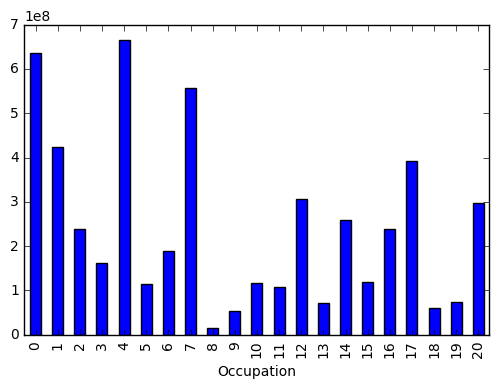

In [24]:
plt.show()

In [25]:
# Top 3 Occupation who has maximum sales are 4 , 0 , 7 respectively

In [26]:
# There are 3631 number of product 
train['Product_ID'].nunique()

3631

In [27]:
X = train.groupby(['Product_ID'])['Purchase'].count().order() 
Y = train.groupby(['Product_ID'])['Purchase'].sum()

C:\Users\dubey\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


In [28]:
# Product that has been sold Maximum number of times is Product P00265242

In [29]:
train.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

In [30]:
# getting the Cities having the Maximum number of Sales 

In [31]:
train.groupby(['City_Category'])['Purchase'].sum().plot(kind="bar")

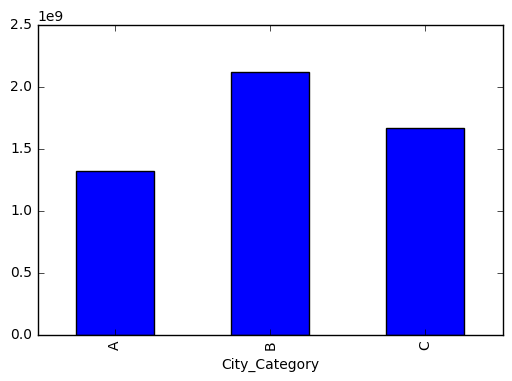

In [32]:
plt.show()

In [33]:
train.loc[(train.City_Category== 'B') ,'City_Category' ] = 1
train.loc[(train.City_Category== 'A') ,'City_Category' ] = 3
train.loc[(train.City_Category== 'C') ,'City_Category' ] = 2

In [34]:
train.groupby(['City_Category','Occupation'])['Purchase'].sum()

City_Category  Occupation
1              0             269927510
               1             173131708
               2             100030987
               3              63774637
               4             270413149
               5              60137301
               6              99613261
               7             215920642
               8               7840524
               9              27534277
               10             37533098
               11             48433837
               12            129250804
               13             20936943
               14            104424365
               15             51164358
               16             99772253
               17            156985224
               18             18652331
               19             30150793
               20            129905603
2              0             198394412
               1             139554206
               2              59303333
               3              48626363

In [35]:
# In all the Cities Same occupation has the Maximum Sales 
# In City 1 -> 0 has 269927510 , 4  has 270413149 , 7 has 215920642
# In City 2 ->  0  has 167085036,4  has 216462404 ,7 has 143423081
#In City 3 -> 0  has 198394412 , 4  has 179368931 ,  7 has 198027864

In [36]:
train.groupby(['City_Category','Stay_In_Current_City_Years'])['Purchase'].sum().plot(kind="bar")

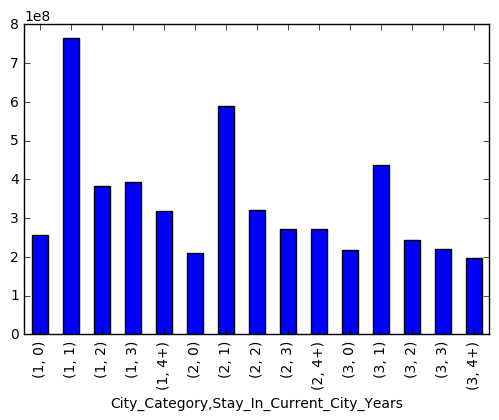

In [37]:
plt.show()

In [38]:
# IN every City Person who is living for One Year Having the Maximum purchases 
# So might be Concluded that Person who newly moved to the City Has the Maximum Sales 
# It Might be due to house Hold Items and Other Stuff 
# Coz in 4th year the sale slightly gets decreased 
# In City 1 as its City B who has maximum sales for the 1st  year


In [39]:
train.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'], dtype=object)

In [40]:
train.loc[(train.Age== '0-17') ,'Age' ] = 1
train.loc[(train.Age== '18-25') ,'Age' ] = 2
train.loc[(train.Age== '26-35') ,'Age' ] = 3
train.loc[(train.Age== '36-45') ,'Age' ] = 4
train.loc[(train.Age== '46-50') ,'Age' ] = 5
train.loc[(train.Age==  '51-55') ,'Age' ] = 6
train.loc[(train.Age== '55+') ,'Age' ] = 7

In [41]:
train.Age.unique()

array([1, 7, 3, 5, 6, 4, 2], dtype=object)

In [42]:
# Checking the Impact of Age on Sales Purchaes 

In [43]:
train.groupby(['Age'])['Purchase'].sum().plot(kind="bar")

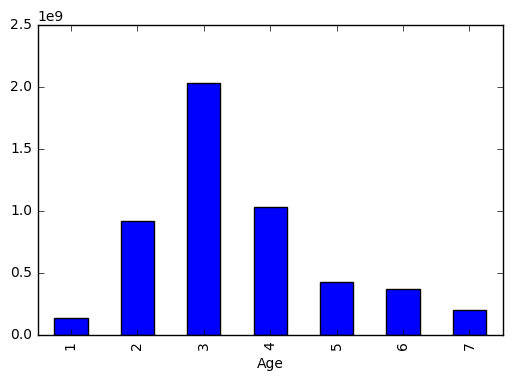

In [44]:
plt.show()

In [45]:
#Maximum number of Purchses been done with the age group of 26-35 Years 
#Checking the Occupation of Each of the Different Ages 

In [46]:
train.groupby(['Age'])['Occupation'].sum().plot(kind="bar")

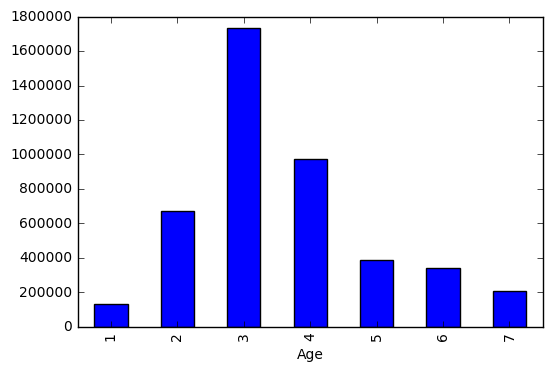

In [47]:
plt.show()

In [48]:
train.groupby(['Age','Occupation'])['Purchase'].count().plot(kind="line")

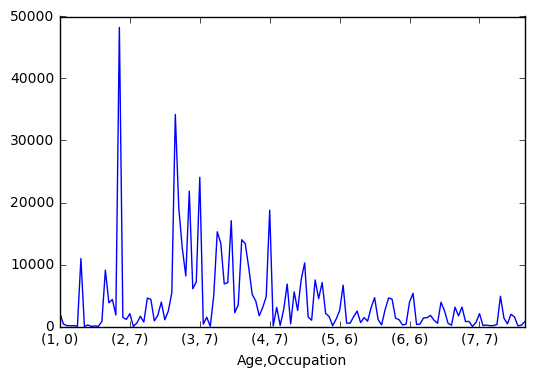

In [49]:
plt.show()

In [50]:
train.groupby(['Age','Occupation'])['Purchase'].count()

Age  Occupation
1    0              2134
     1               387
     2               144
     4               113
     7               139
     8                29
     10            10951
     11               18
     12              237
     13               15
     14               93
     17               35
     19              807
2    0              9095
     1              3820
     2              4364
     3              1860
     4             48241
     5              1450
     6              1144
     7              2078
     8                14
     9               559
     10             1649
     11              717
     12             4585
     14             4388
     15              906
     16             1816
     17             3944
                   ...  
6    11             1383
     12             1417
     13             1785
     14             1012
     15              514
     16             3918
     17             2528
     18              531
     19  

In [51]:
# Some Conclusion Can be Driven from the above result 
# Every age group has one job that maximum people are working 
# like in Age group 1 -> 10 has  10951 purchase 
# Age group 2 has a shap peak 4 has 48241 purchase 

In [52]:
train.User_ID.nunique()

5891

In [53]:
# there are 5891 User and lets check for the User who are Involved in Maximum sales 

In [54]:
train.groupby(['User_ID'])['Purchase'].count().plot(kind="line")

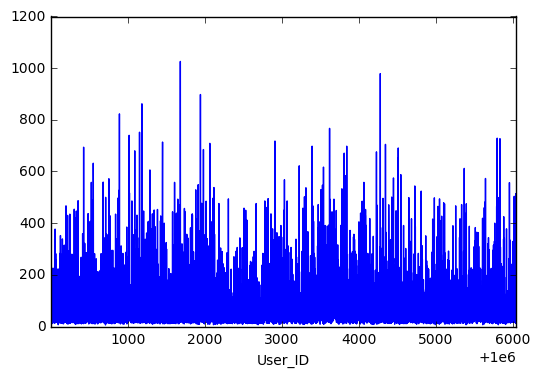

In [55]:
plt.show()

In [56]:
# An Average user has made minimum of 100 purchases 

In [57]:
train.groupby(['User_ID'])['Purchase'].mean().plot(kind="line")

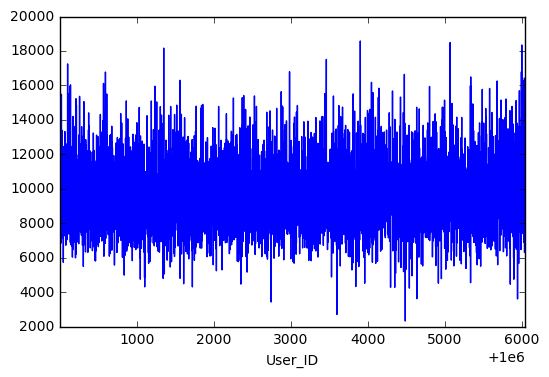

In [58]:
plt.show()

In [59]:
train.groupby(['User_ID'])['Purchase'].median().plot(kind="line")

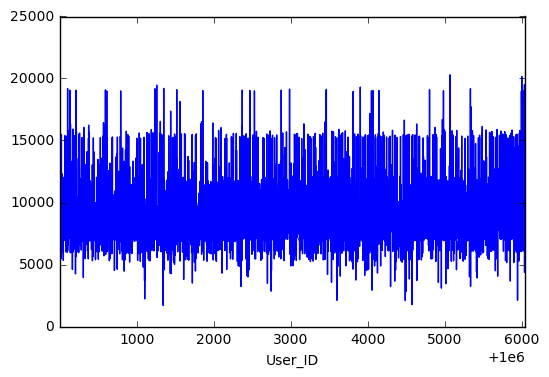

In [60]:
plt.show()

In [61]:
# Conclusion frm the above Graphs show that the averge user purchase is around 10,000 Coz mean and median are nearby same 

In [62]:
# Checking if Gender has any impact on Sales 

In [63]:
train.groupby(['Gender'])['Purchase'].count().plot(kind="Bar")

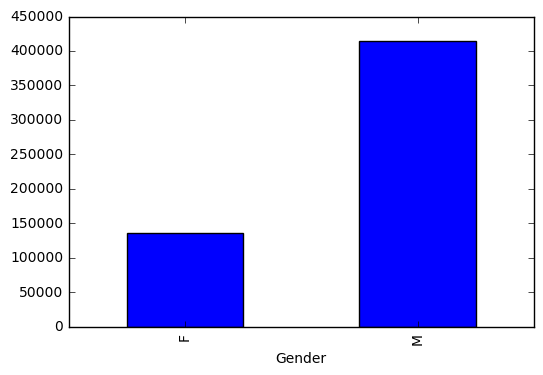

In [64]:
plt.show()

In [65]:
train.groupby(['Gender'])['Purchase'].sum().plot(kind="Bar")

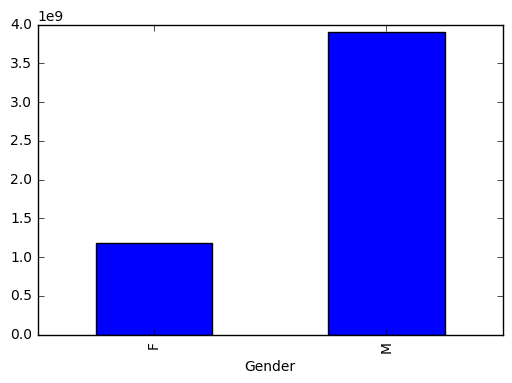

In [66]:
plt.show()

In [67]:
# Conclusion that male shop more and of more amount involved in purchase

In [68]:
train.groupby(['Gender'])['Occupation'].count().plot(kind="Bar")

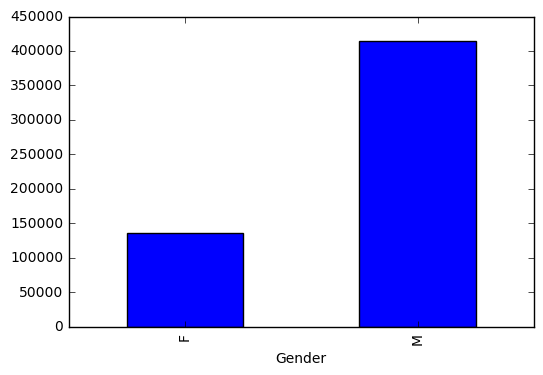

In [69]:
plt.show()

In [70]:
train.groupby(['Gender','Occupation'])['Purchase'].sum().plot(kind="line")

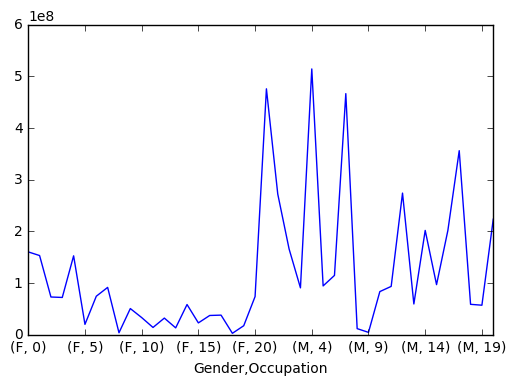

In [71]:
plt.show()

In [72]:
# Male shop more Coz of the More Occupation of the Male involved 
# which has clear impact on the Purchase 


In [73]:
train.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,1,10,3,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,1,10,3,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,1,10,3,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,1,10,3,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,7,16,2,4+,0,8,NaN,NaN,7969


In [74]:
# Checking for the Product P00265242 why its sale is Maximum 
train.groupby(['Product_ID'])['Purchase'].sum().order()


C:\Users\dubey\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


Product_ID
P00091742         405
P00309042         726
P00353042        1545
P00325342        1656
P00012942        1717
P00287042        1739
P00104042        1745
P00357542        1791
P00063442        1866
P00293442        1914
P00107442        1924
P00300742        1958
P00069742        1977
P00203242        2009
P00013842        2021
P00107842        2050
P00172642        2069
P00077542        2096
P00203742        2103
P00012342        2118
P00338242        2123
P00065942        2139
P00107942        2161
P00365942        2177
P00299042        2183
P00169842        2223
P00106342        2229
P00298342        2233
P00083542        2248
P00059342        2256
               ...   
P00120042    14405476
P0097242     14543980
P00128942    14771127
P00113242    15701365
P00112442    15936720
P00111142    16330240
P00242742    16355138
P00270942    16523735
P00334242    17397589
P00044442    17639576
P00005042    17731227
P00112542    18149037
P00114942    19202910
P00052842    19778599

In [75]:
Max_sale_Data =  train.loc[train['Product_ID'] == 'P00025442']

In [76]:
Max_sale_Data.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
667,1000130,P00025442,M,4,17,1,3,1,1,2.0,9.0,19706
749,1000142,P00025442,M,3,7,3,2,0,1,2.0,9.0,15212
833,1000150,P00025442,M,4,7,1,0,1,1,2.0,9.0,15255
1134,1000192,P00025442,M,2,1,1,2,0,1,2.0,9.0,15223
1205,1000198,P00025442,M,3,12,3,0,1,1,2.0,9.0,19296


In [77]:
Max_sale_Data.groupby(['Gender'])['Purchase'].sum().plot(kind="Bar")

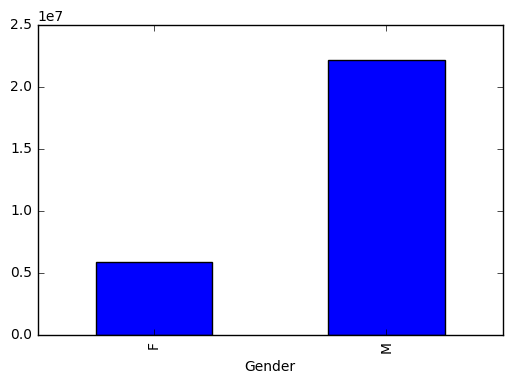

In [78]:
plt.show()

In [79]:
# Maximum Sales of the Product is Done By Men 
# What is Occupation of the People who have the MAximum Sale 


In [80]:
Max_sale_Data.groupby(['Gender','Occupation'])['Purchase'].sum().plot(kind="line")

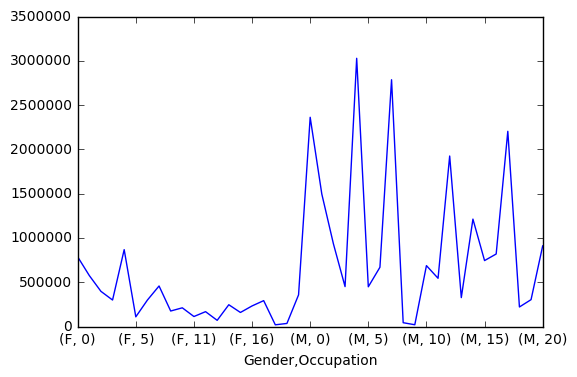

In [81]:
plt.show()

In [82]:
Max_sale_Data.groupby(['City_Category','Stay_In_Current_City_Years'])['Purchase'].sum().plot(kind="Bar")

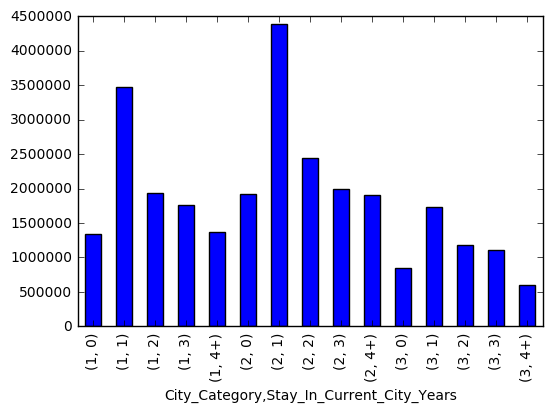

In [83]:
plt.show()

In [87]:
# For Maximum Sale City is 2 with AGe group is 1 

In [96]:
Max_sale_Data.groupby(['User_ID'])['Purchase'].count().plot(kind="line")

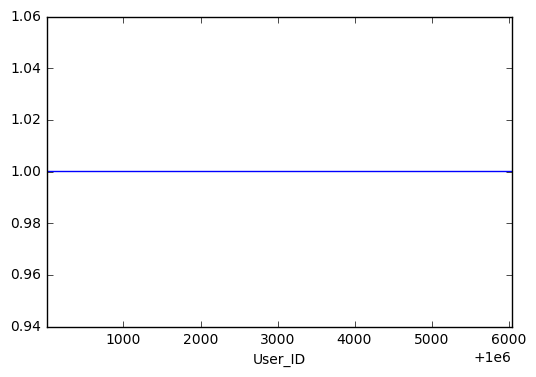

In [97]:
plt.show()

In [104]:
# Every User has only One Order 

In [99]:
Max_sale_Data.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
667,1000130,P00025442,M,4,17,1,3,1,1,2.0,9.0,19706
749,1000142,P00025442,M,3,7,3,2,0,1,2.0,9.0,15212
833,1000150,P00025442,M,4,7,1,0,1,1,2.0,9.0,15255
1134,1000192,P00025442,M,2,1,1,2,0,1,2.0,9.0,15223
1205,1000198,P00025442,M,3,12,3,0,1,1,2.0,9.0,19296


In [101]:
Max_sale_Data.loc[Max_sale_Data['User_ID'] == 1000130]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
667,1000130,P00025442,M,4,17,1,3,1,1,2.0,9.0,19706


In [102]:
Max_sale_Data.loc[Max_sale_Data['User_ID'] == 1000142]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
749,1000142,P00025442,M,3,7,3,2,0,1,2.0,9.0,15212


In [103]:
# Finding the Reason for the Same Product have Different Prices It might have due to Quantity 


In [127]:
train.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,1,1,10,3,2,0,3,NaN,NaN,8370
1,1000001,P00248942,1,1,10,3,2,0,1,6.0,14.0,15200
2,1000001,P00087842,1,1,10,3,2,0,12,NaN,NaN,1422
3,1000001,P00085442,1,1,10,3,2,0,12,14.0,NaN,1057
4,1000002,P00285442,2,7,16,2,4+,0,8,NaN,NaN,7969


In [125]:
train.loc[(train.Gender== 'F') ,'Gender' ] = 1
train.loc[(train.Gender== 'M') ,'Gender' ] = 2

In [126]:
train.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


In [133]:
train[['Gender','Age']] = train[['Gender','Age']].apply(pd.to_numeric)

In [134]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null int64
Age                           550068 non-null int64
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 50.4+ MB


In [135]:
#Checking the Corelation Between the Data Frame 
train.corr()

,User_ID,Gender,Age,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.033474,0.032698,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Gender,-0.033474,1.000000,-0.004262,0.117291,-0.011603,-0.045594,-0.018591,0.028069,0.060346
Age,0.032698,-0.004262,1.000000,0.091463,0.311738,0.061197,0.054877,0.057346,0.015839
Occupation,-0.023971,0.117291,0.091463,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,-0.011603,0.311738,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.045594,0.061197,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.018591,0.054877,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.028069,0.057346,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.060346,0.015839,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


In [155]:
# None of the Data is Highly Corelated 

In [157]:
train.cov()

,User_ID,Gender,Age,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,2.984573e+06,-24.936725,76.465940,-270.113921,17.367619,26.008008,13.461964,24.439292,4.092159e+04
Gender,-2.493672e+01,0.185938,-0.002488,0.329893,-0.002460,-0.077388,-0.040567,0.048381,1.307071e+02
Age,7.646594e+01,-0.002488,1.832319,0.807554,0.207517,0.326069,0.376089,0.315849,1.076926e+02
Occupation,-2.701139e+02,0.329893,0.807554,42.545100,0.077882,-0.195578,-0.012700,0.354959,6.825547e+02
Marital_Status,1.736762e+01,-0.002460,0.207517,0.077882,0.241838,0.038497,0.037819,0.039400,-1.144629e+00
Product_Category_1,2.600801e+01,-0.077388,0.326069,-0.195578,0.038497,15.493760,9.044359,2.438836,-6.795650e+03
Product_Category_2,1.346196e+01,-0.040567,0.376089,-0.012700,0.037819,9.044359,25.873394,10.092953,-5.538125e+03
Product_Category_3,2.443929e+01,0.048381,0.315849,0.354959,0.039400,2.438836,10.092953,17.018411,-4.613754e+02
Purchase,4.092159e+04,130.707141,107.692598,682.554656,-1.144629,-6795.650007,-5538.125114,-461.375426,2.523119e+07


In [182]:
plt.scatter(train.Product_Category_1, train.Purchase)

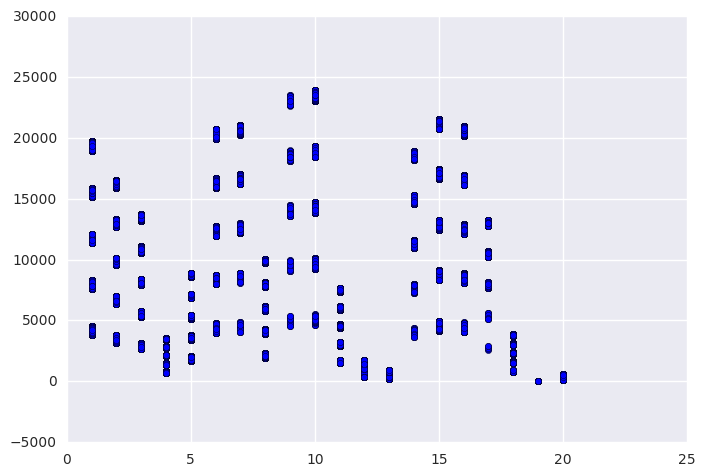

In [183]:
plt.show()

In [184]:
# No Corelation can be Shown between the Data Hence Linear and Logistic Regression are Out of the Box 
